In [2]:
import pandas as pd
import numpy as nd
import sys
import matplotlib.pylab as plt
from typing import Dict, List, Any, Union
import math

In [3]:
data17 = pd.read_csv("PERM_2017.csv")
data18 = pd.read_csv("PERM_2018.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16,122) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#create job class to keep data
class job:
    jobCode = ""
    numApp = 0
    numCert = 0
    certRate = 0.0

    def __init__(self, name):
        self.jobCode = name

    def update(self, status):
        if status != "Withdrawn":
            self.numApp += 1;
        if status == "Certified" or status == "Certified-Expired":
            self.numCert += 1
        if self.numApp!=0:
            self.certRate = self.numCert/self.numApp

In [5]:
#extract job code and case status
jobStatus17 = data17[["PW_SOC_CODE", "CASE_STATUS"]]
jobStatus18 = data18[["PW_SOC_CODE", "CASE_STATUS"]]
jobStatus = pd.concat([jobStatus17, jobStatus18])

In [6]:
s = []
#loop the job status
for i in range(0,len(jobStatus)):
    jobN = jobStatus.iloc[i][0]
    jobN=str(jobN)
    #use only first 2 digits
    jobN = jobN[:2]
    status = jobStatus.iloc[i][1]
    if type(jobN) != str:
        continue
    found = False
    for j in range(0,len(s)):        
        if s[j].jobCode == jobN:
            found = True
            s[j].update(status)
            break
    if found == False:
        newJob = job(jobN)
        s.append(newJob)          

In [9]:
jobArray = []
numArray = []
import operator
s.sort(key=operator.attrgetter('numApp'), reverse = True)
for i in range(0,len(s)):
    print(s[i].jobCode, ", ", s[i].numApp)
    jobArray.append(s[i].jobCode)
    numArray.append(s[i].numApp)

15 ,  116851
17 ,  17696
11 ,  15089
13 ,  12742
25 ,  7159
51 ,  6509
29 ,  5791
35 ,  4393
27 ,  3627
41 ,  3267
19 ,  2695
43 ,  2679
53 ,  2237
37 ,  1933
47 ,  1384
39 ,  1166
31 ,  1092
45 ,  1021
49 ,  866
23 ,  746
21 ,  646
na ,  200
33 ,  20


In [10]:
array=list(numArray)

In [11]:
array

[116851,
 17696,
 15089,
 12742,
 7159,
 6509,
 5791,
 4393,
 3627,
 3267,
 2695,
 2679,
 2237,
 1933,
 1384,
 1166,
 1092,
 1021,
 866,
 746,
 646,
 200,
 20]

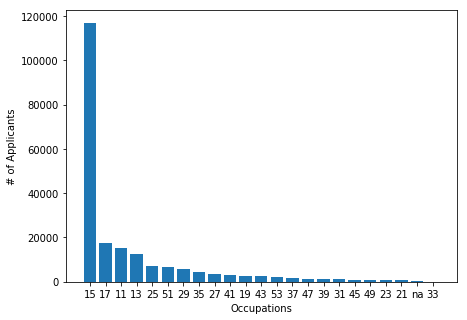

In [13]:
plt.figure(figsize=(7,5))
plt.bar(jobArray, numArray)
plt.xlabel("Occupations")
plt.ylabel("# of Applicants")
plt.savefig("./Applicants' job.pdf")
